In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem
from rdkit.Chem.Scaffolds.MurckoScaffold import GetScaffoldForMol
from rdkit.Chem.Scaffolds.MurckoScaffold import MurckoScaffoldSmiles
from rdkit.Chem.Scaffolds.MurckoScaffold import MakeScaffoldGeneric
from rdkit.DataManip.Metric import GetTanimotoDistMat
from rdkit.DataManip.Metric import GetTanimotoSimMat
from rdkit.Chem import DataStructs


#descripts
from rdkit.Chem import Lipinski
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors

from rdkit.Chem.Lipinski import NumAromaticHeterocycles
from rdkit.Chem.Lipinski import NumAliphaticRings
from rdkit.Chem.Lipinski import NumAromaticHeterocycles
from rdkit.Chem.Lipinski import NumAromaticRings

from scipy.spatial import distance
from sklearn import manifold
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.decomposition import PCA

# plots
from matplotlib import pyplot
import seaborn

import itertools
from itertools import combinations

import numpy as np

from sklearn.metrics import jaccard_score

import os

In [1]:
    #dff['Tanimoto_sim'] = [1 for x in range(len(dff))]
    #for x in range(len(dff)):
    #    try:
    #        dff['Tanimoto_sim'][x] = GetTanimotoSimMat([dff[0][x],dff[1][x]])[0]
    #    except:
    #        display(dff[:40])
    ##        print(x)
     #       print(dff[x])
            #dff.drop([x])

In [ ]:
#list_ = pd.read_csv(f"{root}{name}", sep = ';')
            #dff = pd.DataFrame(list_, columns = ['molregno', 'stand_type', 
            #                        'pchembl_value', 'stand_value',
             #                       'canonical_smiles', 'stand_inchi',
             #                      'chembl_id', 'tid','pref_name'])

In [ ]:
                        #dff['mfp_murcko'].loc[x] = AllChem.GetMorganFingerprintAsBitVect\
                         #          (Chem.MolFromSmiles(MurckoScaffoldSmiles\
                         #         (dff['scaffolds_murcko'][x])), 3, nBits = 2048)

In [ ]:
    #prumery = pd.DataFrame(columns = ['pref_name','pocet_slouc', 
    #                                  'Tanim_sim_murcko', 
    #                                  'Tanim_dis_murcko',
    #                                  'unik_scaf_murcko',
    #                                  'Tanim_sim_generic', 
    #                                  'Tanim_dis_generic',
    #                                  'unik_scaf_generic',
    #                                  'Tanim_sim_csk', 
    #                                  'Tanim_dis_csk',
    #                                   'unik_scaf_csk'])

In [ ]:
list_uniq_chembl = pd.unique(pd.Series(nucler_all['chembl_id']))
list_uniq_standd_type = []
for x in list_uniq_chembl:
    a = nucler_all[nucler_all['chembl_id']==x]
    #print(a['stand_type'].tolist())
    b = unique(a['stand_type'].tolist())
    b = str(b).replace("[", "")
    b = str(b).replace("]", "")
    b = str(b).replace("'", "")
    b = str(b).replace(", ", "+")
    
    if b not in list_uniq_standd_type:
        list_uniq_standd_type.append(b)
    
list_uniq_standd_type.sort(key=len)
display(list_uniq_standd_type)
statistic = pd.DataFrame(columns = list_uniq_standd_type)
statistic.loc[len(statistic)] = 0
statistic

In [2]:
m = Chem.MolFromSmiles('CC1=C(/C=C/C(C)=C/C=C/C(C)=C/C(=O)O)C(C)(C)CCC1')

NumAromaticHeterocycles(m)
NumAliphaticRings(m)
#NumAromaticHeterocycles(m)
#NumAromaticRings(m)

1

In [3]:
AllChem.GetMorganFingerprintAsBitVect\
             (Chem.MolFromSmiles(('O=C(O)c1cc(S(F)(F)(F)(F)F)cc(NS(=O)(=O)c2cc(Br)ccc2O)c1O')), 3, nBits = 2048)

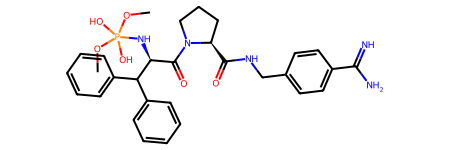

In [4]:
a = 'COP(O)(O)(N[C@@H](C(=O)N1CCC[C@H]1C(=O)NCc1ccc(C(=N)N)cc1)C(c1ccccc1)c1ccccc1)OC'

Chem.MolFromSmiles(a)

In [14]:
Chem.MolToSmiles(MakeScaffoldGeneric\
                        (Chem.MolFromSmiles\
                         (a)))

[11:51:14] Explicit valence for atom # 2 C, 5, is greater than permitted


AtomValenceException: Explicit valence for atom # 2 C, 5, is greater than permitted

In [4]:
from rdkit.Chem.SaltRemover import SaltRemover

In [11]:
remover = SaltRemover()
remover


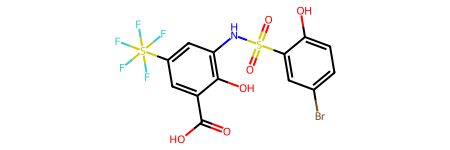

In [12]:
res = remover.StripMol(Chem.MolFromSmiles(a))
res

In [ ]:
nucler_glucocor.groupby(['scaffolds_csk','chembl_id']).sum()

In [ ]:
def rozdeleni_na_shluky_pomoci_TSNE(dff):
    df = dff.drop_duplicates(subset='scaffolds_csk', keep="first")
    df.reset_index(level=0, inplace=True)
    df = df.drop(columns = ['index'])
    
    a = GetTanimotoSimMat(list(df['tanimoto_by_scaffolds']))
    dist_mat_ = distance.squareform(a)
    dist_mat_.shape
    
    clf = manifold.TSNE(n_components=2, metric="precomputed")
    X_tsne = clf.fit_transform(dist_mat_)
    df = df.join(pd.DataFrame(X_tsne, columns=["tsne_x", "tsne_y"]))
    
    reduced_data = df[["tsne_x", "tsne_y"]]
    n_clusters = 5
    for x in range(5):
        kmeans = KMeans(init="k-means++", n_clusters=n_clusters, n_init=4)
        kmeans.fit(reduced_data)
        centroids = kmeans.cluster_centers_
        # Put the result into a color plot
        name = 'cluster_' + f"{x}"
        df[name] = kmeans.labels_
    return df


In [ ]:
def rozdeleni_na_shluky_pomoci_TSNE(dff):
    df = dff.drop_duplicates(subset='scaffolds_csk', keep="first")
    df.reset_index(level=0, inplace=True)
    df = df.drop(columns = ['index'])
    
    a = GetTanimotoSimMat(list(df['mfp']))
    dist_mat_ = distance.squareform(a)
    dist_mat_.shape
    
    clf = manifold.TSNE(n_components=2, metric="precomputed")
    X_tsne = clf.fit_transform(dist_mat_)
    df = df.join(pd.DataFrame(X_tsne, columns=["tsne_x", "tsne_y"]))
    
    reduced_data = df[["tsne_x", "tsne_y"]]
    n_clusters = 5
    for x in range(5):
        kmeans = KMeans(init="k-means++", n_clusters=n_clusters, n_init=4)
        kmeans.fit(reduced_data)
        centroids = kmeans.cluster_centers_
        # Put the result into a color plot
        name = 'cluster_' + f"{x}"
        df[name] = kmeans.labels_
    return df


In [ ]:
def rozdeleni_na_shluky_(dff):
    df = dff.drop_duplicates(subset='scaffolds_csk', keep="first")
    df.reset_index(level=0, inplace=True)
    df = df.drop(columns = ['index'])
    
    a = GetTanimotoSimMat(list(df['mfp']))
    dist_mat_ = distance.squareform(a)
    
    n_clusters = 5
    for x in range(5):
        kmeans = KMeans(init="k-means++", n_clusters=n_clusters)
        kmeans.fit(dist_mat_)
        centroids = kmeans.cluster_centers_
        name = 'cluster_' + f"{x}"
        df[name] = kmeans.labels_
    return df
